#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [9]:
# Read CSV
import pandas as pd
url = 'https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv'
df = pd.read_csv(url)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [10]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv'
df = pd.read_csv(url)
duplicate =df.duplicated().any()

print(duplicate)


True


Periksa apakah ada missing values

In [12]:
missing_value = df.isnull().any()
print(missing_value)

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool


Periksa outlier dengan boxplot untuk setiap kolom feature

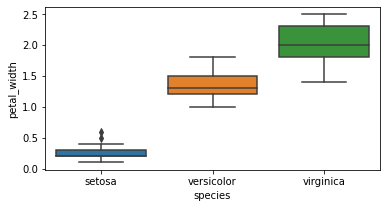

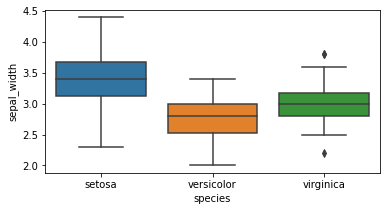

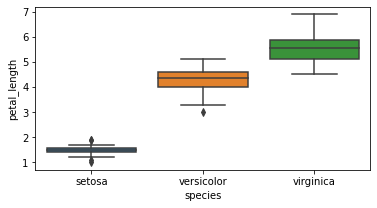

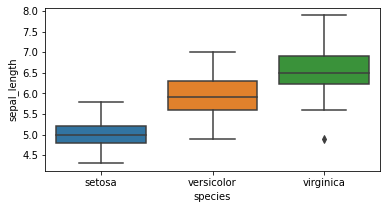

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv'
df = pd.read_csv(url)

features = ['petal_width', 'sepal_width', 'petal_length', 'sepal_length']
for feature in features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='species', y=feature, data=df)
    plt.xlabel('species')
    plt.ylabel(feature)
    plt.show()



Pisahkan dataset menjadi variabel independen dan variabel dependen

In [28]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] 
Y = df['species'] 


Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [50]:
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, Y_train)
Y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)

1.0


Uji model dengan dataset test

In [59]:
Y_pred = model.predict(X_test_scaled)
print(Y_pred)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa']


In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)
print("Confusion Matrix")
print(confusion)
print(f"Accuracy Score: {accuracy:.4f}")

Confusion Matrix
[[6 0 0]
 [0 6 0]
 [0 0 3]]
Accuracy Score: 1.0000


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [39]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_scaled, Y_train)

GaussianNB()

Uji hasil model dengan data test

In [52]:
from sklearn.metrics import accuracy_score
Y_pred = naive_bayes_model.predict(X_test_scaled)
print(Y_pred)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [54]:
Y_pred = naive_bayes_model.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 1.0000


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [56]:
knn_model = KNeighborsClassifier(metric='euclidean')
knn_model.fit(X_train_scaled, Y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [57]:
Y_pred = knn_model.predict(X_test_scaled)
print(Y_pred)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa']


Ukur akurasi dari model K-Nearest Neighbor

In [58]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Akurasi Model KNN: {accuracy:.4f}')

Akurasi Model KNN: 1.0000


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...